<h1><center>Hito 7</center></h1>

<h1><center>Impacto del Bit-Rate</center></h1>

&nbsp;

<center>
Álvaro Garcı́a Garcı́a<br>
Álvaro José Martı́nez Sánchez<br>
José Francisco Castillo Berenguel<br>
</center>
    
    
<hr style="border:1px solid gray"> </hr>


# Introducción


En el hito 6 se estudiaron los efectos de la latencia y su variación (jitter). No obstante, existen otros factores que también afectan a la conexión. En este hito se realizará el estudio de la tasa de bits (Bit rate). 

Este valor de bit-rate depende del ancho de banda y de la congestión de la red. La congestión de la red resulta ser un factor arbitrario en la práctica, pero el ancho de banda puede considerarse constante.

La idea consistirá en obtener datos sobre el efecto del bit rate para posteriormente realizar la emulación con e comando 
`tc`

# Estimación del bit-rate en un enlace de internet


## Fundamentos

## Consideraciones

Se pide realizar distintos tipos de ping donde se incluye realizarlos con el mayor y menor payload. Para que los ping se realicen satisfactoriamente es necesario tener en cuenta estos efectos

1. La cabecera de ICMPv4 ocupa 8 B.

2. El valor mínimo de payload es 0. Sin embargo no se contabilizan los tiampos para payload menores de 16B (24B con la cabecera).

3. El valor máximo de payload es 65507.


## Procedimiento

Vamos a realizar el mismo procedimiento para 3 conexiones distintas:

1. Localhost
2. Red local
3. Conexión internet

Para ello realizamos ping con el menor y mayor payload posible 16B y 65507B respectivamente. Una vez hecho, cargamos los resultados. Sin embargo al final del ping se ofrecen las estadísticas del mismo y por tanto no hay que realizar cálculos. Obtenemos los datos:

In [1]:
!export LC_NUMERIC=en_US.UTF-8

!tail -n 1 ping-minimo-localhost.dat | cut -f 2 -d "=" | cut -f 2 -d "/" > average-localhost.dat
!tail -n 1 ping-maximo-localhost.dat | cut -f 2 -d "=" | cut -f 2 -d "/" >> average-localhost.dat

!tail -n 1 ping-minimo-redlocal.dat | cut -f 2 -d "=" | cut -f 2 -d "/" > average-redlocal.dat
!tail -n 1 ping-maximo-redlocal.dat | cut -f 2 -d "=" | cut -f 2 -d "/" >> average-redlocal.dat

!tail -n 1 ping-minimo-internet.dat | cut -f 2 -d "=" | cut -f 2 -d "/" > average-internet.dat
!tail -n 1 ping-maximo-internet.dat | cut -f 2 -d "=" | cut -f 2 -d "/" >> average-internet.dat

!tail -n 1 ping-minimo-internet2.dat | cut -f 2 -d "=" | cut -f 2 -d "/" > average-internet2.dat
!tail -n 1 ping-maximo-internet2.dat | cut -f 2 -d "=" | cut -f 2 -d "/" >> average-internet2.dat

Cargamos los datos en python

[0.037 0.163]
[18.557 45.203]
[27.731 56.002]
[ 41.056 104.125]

Tiempos de RTT
[0.037 0.163]
[18.557 45.203]
[27.731 56.002]
[ 41.056 104.125]

Tiempos de propagación
0.0185
9.2785
13.8655
20.528

Tiempos de transmisión
0.063
13.323000000000002
14.1355
31.5345



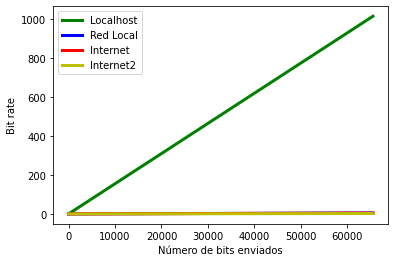

In [2]:
import numpy as np
import matplotlib.pyplot as plt
    
rtt_localhost = np.loadtxt("average-localhost.dat")
rtt_redlocal = np.loadtxt("average-redlocal.dat")
rtt_internet = np.loadtxt("average-internet.dat")
rtt_internet2 = np.loadtxt("average-internet2.dat")

print(rtt_localhost)
print(rtt_redlocal)
print(rtt_internet)
print(rtt_internet2)
print()
# Pasamos a segundos ¿?

rtt_localhost = rtt_localhost[:]#/1000
rtt_redlocal = rtt_redlocal[:]#/1000
rtt_internet = rtt_internet[:]#/1000
rtt_internet2 = rtt_internet2[:]#/1000

print("Tiempos de RTT")
print(rtt_localhost)
print(rtt_redlocal)
print(rtt_internet)
print(rtt_internet2)
print()

tp_localhost = rtt_localhost[0]/2
tp_redlocal = rtt_redlocal[0]/2
tp_internet = rtt_internet[0]/2
tp_internet2 = rtt_internet2[0]/2

print("Tiempos de propagación")
print(tp_localhost)
print(tp_redlocal)
print(tp_internet)
print(tp_internet2)
print()

tt_localhost = (rtt_localhost[1] - 2.0 * tp_localhost) / 2.0
tt_redlocal = (rtt_redlocal[1] - 2.0 * tp_redlocal) / 2.0
tt_internet = (rtt_internet[1] - 2.0 * tp_internet) / 2.0
tt_internet2 = (rtt_internet2[1] - 2.0 * tp_internet2) / 2.0

print("Tiempos de transmisión")
print(tt_localhost)
print(tt_redlocal)
print(tt_internet)
print(tt_internet2)
print()

def b(B, tt):
    return B/tt

space = np.linspace(0,65507, 65507)

bitrate = lambda B, tt: ((B/tt)/1024) 

plt.plot(space, bitrate(space, tt_localhost), 'g',linewidth=3, label='Localhost') 
plt.plot(space, bitrate(space, tt_redlocal), 'b',linewidth=3, label='Red Local') 
plt.plot(space, bitrate(space, tt_internet), 'r',linewidth=3, label='Internet')
plt.plot(space, bitrate(space, tt_internet2), 'y',linewidth=3, label='Internet2')
plt.ylabel(ylabel="Bit rate")
plt.xlabel(xlabel="Número de bits enviados")
plt.legend()
plt.show()
#print(len(space))
#print(bitrate(space,10))

Dado que localhost tiene un bitrate "elevado", se procede a realizar al comparativa descartando localhost

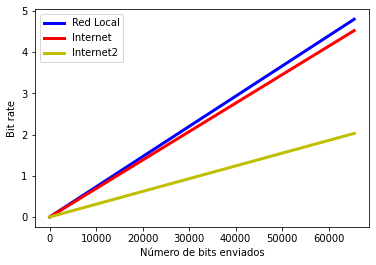

[0.00000000e+00 6.90868670e-05 1.38173734e-04 ... 4.52546613e+00
 4.52553522e+00 4.52560431e+00]


In [3]:

plt.plot(space, bitrate(space, tt_redlocal), 'b',linewidth=3, label='Red Local') 
plt.plot(space, bitrate(space, tt_internet), 'r',linewidth=3, label='Internet')
plt.plot(space, bitrate(space, tt_internet2), 'y',linewidth=3, label='Internet2')
plt.ylabel(ylabel="Bit rate")
plt.xlabel(xlabel="Número de bits enviados")
plt.legend()
plt.show()

print(bitrate(space, tt_internet))

# Simulación del enlace

Una vez se tienen los valores de bitrate, se procede a mejorar la simulación realizada en el hito anterior. Para ello se hace uso del comando  `tc`. Dado que se va a hacer uso de intercom con 1024 Bytes, es necesario calcular el bitrate específico para ese valor, usando solamente el enlace de internet

In [9]:
bitrate1 = bitrate(44100 * 16 * 2,tt_internet2)
print(bitrate1)

43.70213575607668


Se procede a emular la latencia y la pérdida de paquetes. Para ello, primero se debe ver la configuración

In [6]:
!tc qdisc show dev lo 

qdisc noqueue 0: root refcnt 2 


Imponemos la regla para emular el bitrate

In [7]:
from getpass import getpass
!echo {getpass()} | sudo -S tc qdisc add dev lo root handle 1: tbf rate 0.566kbit burst 32kbit limit 32kbit

········
[sudo] password for cobeguel: 

Se activa la regla del hito anterior

In [ ]:
!echo {getpass()} | sudo -S tc qdisc add dev lo parent 1:1 handle 10: netem delay 43.75ms 6.88ms 0.375% distribution normal

Visualizamos la configuración

In [ ]:
!echo {getpass()} | sudo -S tc qdisc show dev lo

A continuación ejecutamos intercom y evaluamos la calidad de la experiencia

Resultados

Finalmente borramos las reglas

In [ ]:
!echo {getpass()} | sudo -S tc qdisc delete dev lo root handle 1: tbf rate 0.5kbit burst 32kbit limit 32kbit
!echo {getpass()} | sudo -S tc qdisc delete dev lo parent 1:1 handle 10: netem delay 43.75ms 6.88ms 0.375% distribution normal

Verificamos que se han eliminado las reglas

In [ ]:
!echo {getpass()} | sudo -S tc qdisc show dev lo